In [104]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.DataFrame(sns.load_dataset("penguins"))

print(f"The shape of the dataset is {df.shape}")
if df.isnull().any().any():
  print(f"There are missing values in the dataset")
else:
  print(f"There are no missing values in the dataset")

from pandas.api.types import is_numeric_dtype
df = df.apply(lambda x: x.fillna(x.median()) if is_numeric_dtype(x) else x.fillna(x.mode().iloc[0]))

print(df.head())

print(df.describe())

The shape of the dataset is (344, 7)
There are missing values in the dataset
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen           39.10           18.7              181.0   
1  Adelie  Torgersen           39.50           17.4              186.0   
2  Adelie  Torgersen           40.30           18.0              195.0   
3  Adelie  Torgersen           44.45           17.3              197.0   
4  Adelie  Torgersen           36.70           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       4050.0    Male  
4       3450.0  Female  
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      344.000000     344.000000         344.000000   344.000000
mean        43.925000      17.152035         200.892442  4200.872093
std          5.443792       1.969060          14.023826   799.696532
min         32.100000      13.100000         172.000

In [105]:
categorical_features = [col for col in df.columns if not is_numeric_dtype(df[col]) and col != "sex"]
data_with_dummies = pd.get_dummies(df, columns=categorical_features)

# as a convention, I prefer to place the column to be predicted as the last one
columns = data_with_dummies.columns.tolist()
columns.insert(len(columns), columns.pop(columns.index("sex")))
data_with_dummies = data_with_dummies.loc[:, columns]

df = data_with_dummies

df.sex = df.sex.map(lambda x: 1 if x == "Male" else -1)

print(df.head)

X = df.iloc[:, :-1]
y = df.sex

<bound method NDFrame.head of      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0             39.10           18.7              181.0       3750.0   
1             39.50           17.4              186.0       3800.0   
2             40.30           18.0              195.0       3250.0   
3             44.45           17.3              197.0       4050.0   
4             36.70           19.3              193.0       3450.0   
..              ...            ...                ...          ...   
339           44.45           17.3              197.0       4050.0   
340           46.80           14.3              215.0       4850.0   
341           50.40           15.7              222.0       5750.0   
342           45.20           14.8              212.0       5200.0   
343           49.90           16.1              213.0       5400.0   

     species_Adelie  species_Chinstrap  species_Gentoo  island_Biscoe  \
0              True              False           False  

***********
[[ 1.  39.1 18.7 ...  0.   0.   1. ]
 [ 1.  39.5 17.4 ...  0.   0.   1. ]
 [ 1.  40.3 18.  ...  0.   0.   1. ]
 ...
 [ 1.  50.4 15.7 ...  1.   0.   0. ]
 [ 1.  45.2 14.8 ...  1.   0.   0. ]
 [ 1.  49.9 16.1 ...  1.   0.   0. ]]
***********
[ 1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1
  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1
  1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1  1 -1  1 -1 -1  1
 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1
  1 -1 -1  1 -1  1

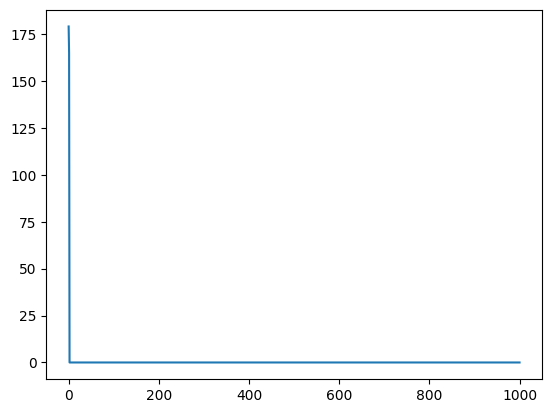

In [106]:
w = np.random.randn(11) # 10 because i have 10 features

eta = 1e-3
batch_size = 8
max_epochs = 1000
errors_epoch = np.zeros(max_epochs + 1)

X1 = X.to_numpy()
X0 = np.ones(X.shape[0])

X = np.column_stack((X0, X1))
y = y.to_numpy()
X = X.astype(np.float64)

print("***********")
print(X)
print("***********")
print(y)
print("***********")

for epoch in range(max_epochs):

  errors_epoch[epoch] = sum((y * np.sign(np.dot(X, w))) < 0)

  rand_perm = np.random.permutation(range(y.shape[0]))
  X = X[rand_perm, :]
  y = y[rand_perm]

  for i in range(0, y.shape[0], batch_size):
    X_batch = X[i : (i + batch_size), :]
    y_batch = y[i : (i + batch_size)]

    w = w + eta * np.dot(X_batch.T,(y_batch - np.dot(X_batch, w)))
  
  errors_epoch[epoch + 1] = sum((y * np.sign(np.dot(X, w))) < 0)

print(f"# of errors = {errors_epoch[-1]}")
plt.plot(range(max_epochs + 1), errors_epoch)